### Optimization Data Additional Train

In [12]:
import pandas as pd

df_original = pd.read_csv('final-6.csv')
df1 = pd.read_csv('sensor_data_Exercise_expanded.csv', index_col=False)
df2 = pd.read_csv('sensor_data_Sleep.csv', index_col=False)
df3 = pd.read_csv('sensor_data_study.csv', index_col=False)
df4 = pd.read_csv('sensor_data_study2.csv', index_col=False)

In [13]:
df1 = df1.drop(columns=['sec','week','idx1','idx2','idx3','idx4','idx5','idx6','idx7','idx8','idx9','idx0'])
df2 = df2.drop(columns=['sec','week','idx1','idx2','idx3','idx4','idx5','idx6','idx7','idx8','idx9','idx0'])
df3 = df3.drop(columns=['sec','week','idx1','idx2','idx3','idx4','idx5','idx6','idx7','idx8','idx9','idx0'])
df4 = df4.drop(columns=['sec','week','idx1','idx2','idx3','idx4','idx5','idx6','idx7','idx8','idx9','idx0'])

In [14]:
df_final = pd.concat([df_original, df1, df2, df3, df4], axis=0)

In [15]:
df_final = df_final[df_final['peak']!=0]

In [16]:
sleep_df = df_final[df_final['category'] == 'sleep'].sample(frac=1/3, random_state=42)
not_else_df = df_final[df_final['category'] != 'else']
df_final = pd.concat([not_else_df[not_else_df['category'] != 'sleep'], sleep_df], ignore_index=True)

In [17]:
df_final['category'].value_counts()

category
sleep       3646
study       2643
class       2167
exercise     870
Name: count, dtype: int64

## Feature importance

In [25]:
import numpy as np

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_final.drop(columns=['category'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
y = LabelEncoder().fit_transform(df_final['category'])

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# TOP 10 feature
top10_features = feature_importance_df.head(10)
print("Top 10 Important Features:")
print(top10_features)


Top 10 Important Features:
      feature  importance
1   longitude    0.106643
0    latitude    0.092109
33    inclass    0.091765
24      rssi2    0.078940
21   bssidcnt    0.070675
23      rssi1    0.052896
2         lux    0.049669
3      accelx    0.039562
13       mag3    0.039105
30      rssi8    0.036435


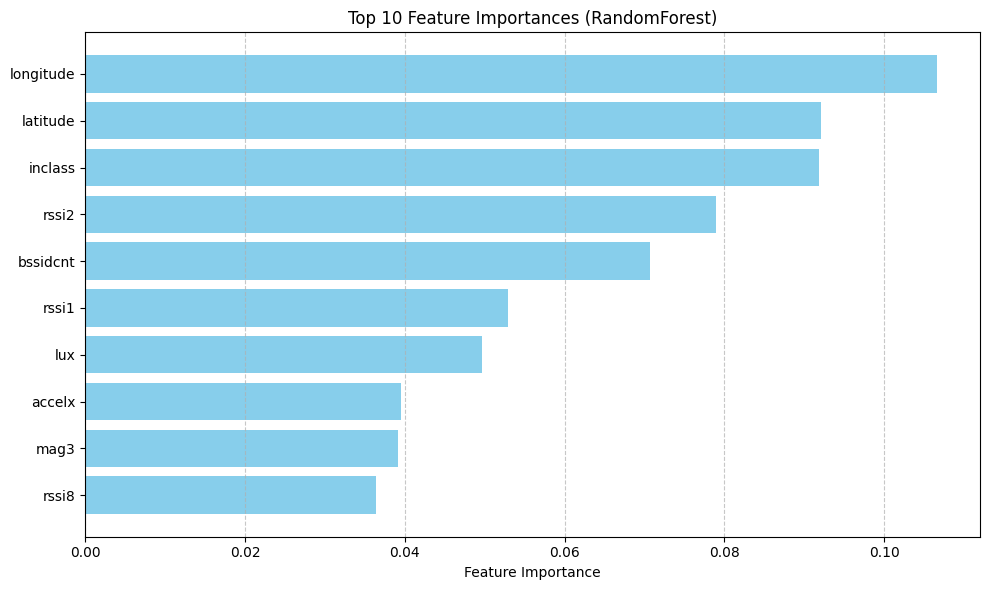

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top10_features['feature'], top10_features['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (RandomForest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
print("\nIntra-class Variance for Top 10 Features:")
X_top10 = X[top10_features['feature'].values]
y_labels = df_final['category'].values

for category in np.unique(y_labels):
    subset = X_top10[y_labels == category]
    variance = np.mean(np.var(subset, axis=0))
    print(f"{category}: Avg var. = {variance:.5f}")


Intra-class Variance for Top 10 Features:
class: Avg var. = 0.20458
exercise: Avg var. = 2.51861
sleep: Avg var. = 0.01310
study: Avg var. = 0.03296
